<a href="https://colab.research.google.com/github/angelblancas/03MAIR-Algoritmos-de-Optimizacion/blob/master/AG3/Angel_Blancas_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG - Actividad Guiada 3<br/>
Nombre: Ángel Blancas García<br/>
URL: [https://github.com/angelblancas/03MAIR-Algoritmos-de-Optimizacion/tree/master/AG3](https://github.com/angelblancas/03MAIR-Algoritmos-de-Optimizacion/tree/master/AG3)

In [44]:
import urllib.request
file ="swiss42.tsp"
urllib.request.urlretrieve('http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp', file)

('swiss42.tsp', <http.client.HTTPMessage at 0x7f7d37946828>)

In [45]:
!pip install tsplib95

In [0]:
import random 
import tsplib95
from math import e

#Carga de la información del problema
problem = tsplib95.load_problem(file) 
#Nodos
Nodos = list(problem.get_nodes())
#Aristas
Aristas = list(problem.get_edges()) 

In [48]:
print ('Nodos', Nodos)
print ('Aristas', Aristas)

Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

In [49]:
#FUNCIONES AUXILIARES 

#Devuelve el factorial de un numero
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos): 
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.wfunc(a,b)

#Devuelve la distancia total de una trayectoria/solución
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)



solucion=crear_solucion(Nodos)
distancia_total(solucion, problem)

5481

In [50]:
# Funcion de busqueda aleatoria siendo N el número de ciclos que queremos hacer nuestra búsqueda
def busqueda_aleatoria(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  #Inicializar el bucle
  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia = distancia_total(solucion, problem)
    
    if distancia < mejor_distancia:
      mejor_solucion = solucion
      mejor_distancia = distancia
      
      
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  

sol =busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 10, 12, 11, 25, 13, 35, 33, 30, 3, 4, 39, 23, 40, 24, 27, 20, 37, 7, 15, 2, 31, 16, 29, 36, 34, 19, 1, 17, 38, 22, 41, 8, 26, 18, 32, 28, 9, 21, 5, 14, 6]
Distancia     : 3574


In [51]:
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:] 
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

solucion=crear_solucion(Nodos)
print(solucion)
nueva_solucion= genera_vecina(solucion)
print(nueva_solucion)

[0, 11, 16, 36, 34, 26, 17, 38, 13, 20, 9, 8, 41, 30, 22, 3, 27, 35, 28, 2, 37, 15, 10, 4, 1, 33, 5, 29, 31, 21, 39, 23, 18, 12, 24, 7, 32, 40, 25, 14, 6, 19]
[0, 11, 16, 36, 34, 26, 17, 38, 33, 20, 9, 8, 41, 30, 22, 3, 27, 35, 28, 2, 37, 15, 10, 4, 1, 13, 5, 29, 31, 21, 39, 23, 18, 12, 24, 7, 32, 40, 25, 14, 6, 19]


In [52]:
def busqueda_local(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  solucion_referencia=crear_solucion(Nodos)
  
  for i in range(N):
    vecina=genera_vecina(solucion_referencia)
    distancia_vecina= distancia_total(vecina, problem)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion= vecina
      mejor_distancia= distancia_vecina
    else:
      solucion_referencia=vecina
  
       
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  
 
  
sol=busqueda_local(problem, 100)

Mejor solución: [0, 27, 2, 28, 34, 33, 38, 22, 18, 26, 3, 32, 31, 17, 36, 35, 20, 30, 29, 9, 39, 21, 24, 40, 23, 5, 15, 37, 7, 1, 4, 6, 14, 16, 19, 13, 12, 11, 25, 10, 41, 8]
Distancia     : 1986


In [0]:
# Dada una solución generamos una solucion vecina cualquiera
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  return vecina

# Funcion de probabilidad basada en exponencial
def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False
  
  
# Funcion para descender la temperatura (mejorable)
def bajar_temperatura(T):
  return T-1

In [54]:
# Recocido Simulado
def recocido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = 10e100
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    #vecina = genera_vecina_aleatorio(solucion_referencia)
    vecina = genera_vecina(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)

  return mejor_solucion

sol = recocido_simulado(problem, 100)

La mejor solución encontrada es [0, 1, 3, 32, 20, 35, 36, 17, 31, 8, 9, 39, 21, 23, 41, 25, 18, 26, 5, 6, 4, 2, 27, 28, 34, 33, 29, 10, 11, 12, 13, 19, 14, 16, 15, 37, 7, 30, 38, 22, 24, 40]
con una distancia total de 1965


In [0]:
# FUNCIONES AUXILIARES ASOCIADAS AL ALGORITMO DE LA COLONIA DE HORMIGAS
def Add_Nodo(problem, H ,T):
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(list(set(range(1,len(Nodos))) - set(H) )  ) # AÑADIR UNO DE FORMA ALEATORIA NO ES LO MAS EFICIENTE


def Incrementa_Feromona(problem, T, H):
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

In [56]:
def hormigas(problem, N):
  #problem = datos del problema
  #N = Número de agentes(hormigas)
    
  #Nodos
  Nodos = list(problem.get_nodes())
    #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  for h in range(N):
    #print("\nAgente:", h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :
      
      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N):
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print(mejor_solucion)
  print(mejor_distancia)
  
  
hormigas(problem, 1000)

[0, 29, 36, 15, 16, 37, 38, 39, 7, 30, 26, 13, 19, 35, 3, 41, 9, 2, 32, 8, 24, 21, 22, 20, 28, 14, 23, 33, 40, 25, 18, 5, 1, 4, 12, 17, 31, 6, 11, 10, 34, 27]
3958


In [57]:
!pip install networkx

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


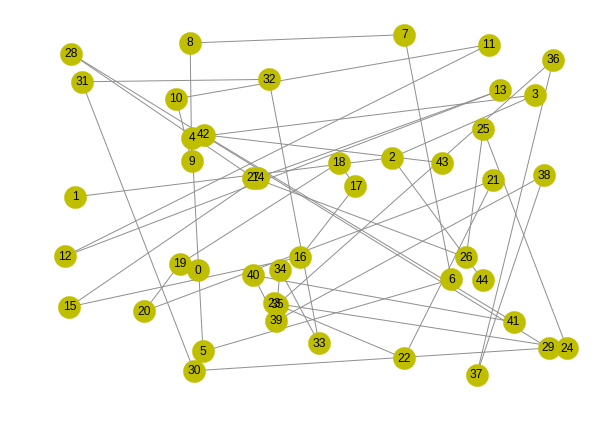

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafo(Nodos, Aristas):
  
  G=nx.Graph()
  
  G.clear()

  #Dibuja los nodos
  G.add_nodes_from(Nodos)
  print(Nodos)


  #Dibuja aristas
  aristas = Aristas +  [(70 ,1 )]
  #print(aristas)
  G.add_edges_from(aristas)


  #nx.draw_networkx_labels(G,pos,labels,font_size=16)

  labels = {}
  for idx, node in enumerate(G.nodes()):
      labels[node] =  idx 

  nx.draw_random(G,node_color='y',edge_color='#909090',node_size=500, labels = labels )


Nodos = list(map( lambda x:problem.get_display(x) ,problem.get_nodes()))
Aristas = list(map(lambda x: (x,x+1), problem.get_nodes()))

#print(Aristas)


dibujar_grafo(Nodos, Aristas)